In [1]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [2]:
# Datos en bruto
data = datasets.load_wine()

#### Creación del dataset

In [3]:
df_wine = pd.DataFrame(data=data.data, columns=data.feature_names)
df_wine['target'] = data.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.shape

(178, 14)

### Exploración de datos

In [ ]:
df = df_wine[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
 'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline','target']]
sns.pairplot(df, hue='target', height=4, palette='tab10')
plt.show()

### Preprocesamiento de datos
#### Selección de datos

In [5]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_wine.drop('target', axis=1)

# Defino los datos correspondientes a las etiquetas
y = df_wine['target']

#### División de datos (conjuntos de entrenamiento y prueba)

In [6]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### Visualización de los datos

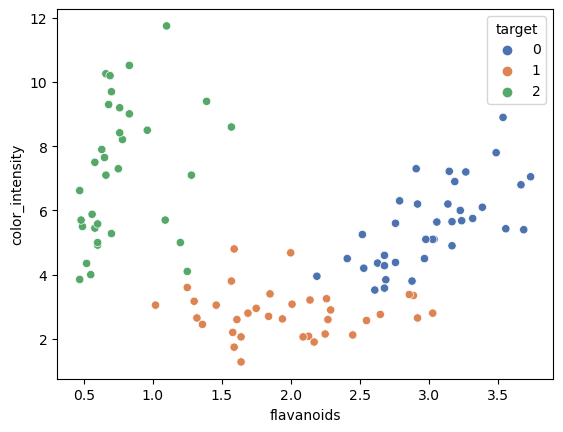

In [7]:
X_plot = X_train.copy()
X_plot['target'] = y_train

sns.scatterplot(x= 'flavanoids', y ='color_intensity', data= X_plot, hue='target', palette = 'deep' )
plt.show()

### Normalización de los datos

In [8]:
# Buscamos valores atípicos para determinar que técnica utilizamos para la normalización de datos

Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR = Q3 - Q1

# Establecer un umbral para los valores atípicos
umbral = 1.5
valores_atipicos = df_wine[((df_wine < Q1 - umbral * IQR) | (df_wine > Q3 + umbral * IQR))]

contador_nan = valores_atipicos.isna().sum()

print(contador_nan)

alcohol                         178
malic_acid                      175
ash                             175
alcalinity_of_ash               174
magnesium                       174
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 176
color_intensity                 174
hue                             177
od280/od315_of_diluted_wines    178
proline                         178
target                          178
dtype: int64


#### StandardScaler
##### Aplicamos StandarScaler para que los datos atípicos no afecten a la normalización

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###### Visualizamos los datos

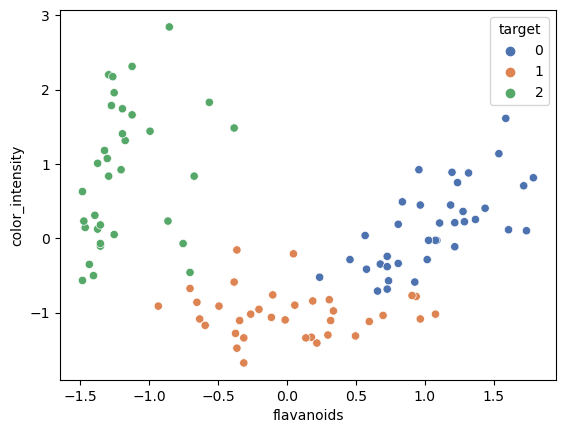

In [10]:
X_plot = pd.DataFrame(X_train, columns=X_plot.columns[:-1], index=X_plot.index)
X_plot['target'] = y_train

sns.scatterplot(x='flavanoids', y='color_intensity', data=X_plot, hue='target', palette='deep')
plt.show()

### LDA

In [11]:
# Aplicamos el módelo para 2 componentes
# Se aplica tanto a la 'x' como la 'y' porque este modelo trabaja sobre etiquetas
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [12]:
# Buscamos el porcentaje de representación que tiene cada componente
lda.explained_variance_ratio_

array([0.785668, 0.214332])

###### Visualizamos los datos

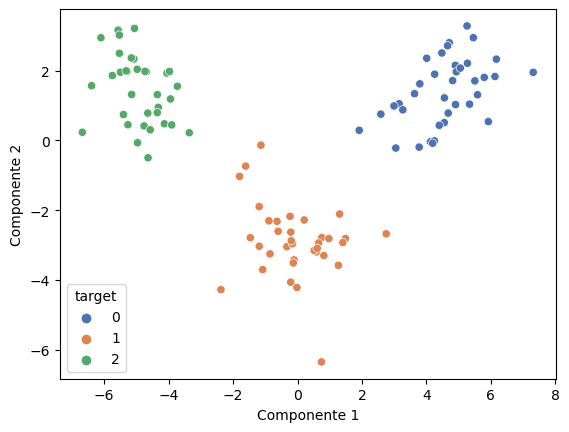

In [13]:
X_plot = pd.DataFrame(X_train_lda, columns=['Componente 1', 'Componente 2'], index=X_plot.index)
X_plot['target'] = y_train

sns.scatterplot(x='Componente 1', y='Componente 2', data=X_plot, hue='target', palette='deep')
plt.show()

#### Creación del modelo

In [14]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

#### Predicción del modelo

In [15]:
y_pred = classifier.predict(X_test)

#### Evaluación del modelo

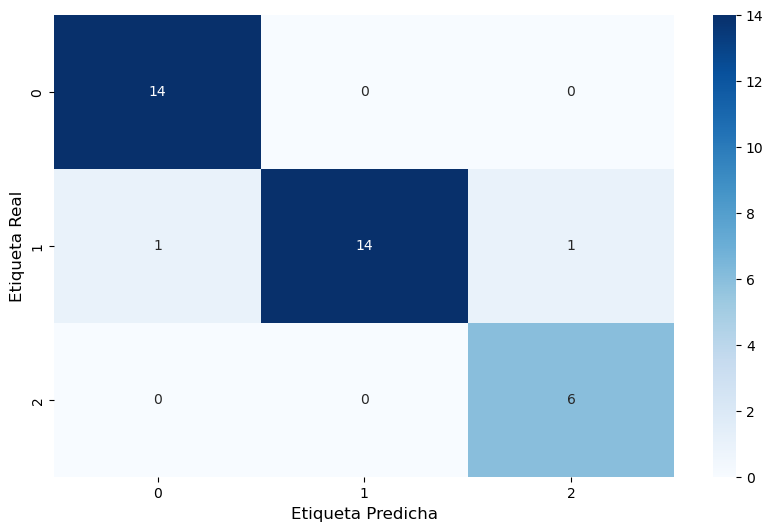

In [16]:
# Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

### Métricas

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



### Conclusión

Para este conjunto de datos, primero he realizado una exploración para comprobar que variables podrian ser más influyentes a la hora de aplicar un modelo u otro. Una vez hecho ese primer contacto con los datos, he divido los columnas numéricas de las categóricas para poder dividir la 'x' de 'y', y así poder separar el conjunto de entrenamiento y prueba. En tercer lugar, he calculado la cantidad de elementos atípicos que tenian los datos para comprobar que modelo de normalización tenía que aplicar. Al obtener un 8% de datos atípicos, he decidido aplicar el StandardScaler. Una vez normalizados los datos, he aplicado el modelo LDA, pues es el idóneo cuando tenemos etiquetas . Al aplicarlo, el modelo ha determinado que existian dos componentes con altas probabilidades de una predicción fiable. Despues de probar tanto solo con un componente como con dos, he comprobado que usando los dos componentes teniamos un 94% de fiabilidad. Esta fiabilidad se traduce en que para el grupo '0' y el 2 sería capaz de identificar sin problemas de que clase son , y que con el único que tendría alguna dificultad para identificarlo sería el 1.